## Neural Networks Project

### Titanic Dataset

**Attributes**

* Survived: 0 = Not survived, 1 = Survived
* Pclass: Ticket class 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* Name: Name of passenger
* Sex: male, female
* Age: Age of passenger
* Sibsp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
#Run this code only if you use google colab
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


**Question1: Import the required libraries and read Titanic.csv file and save it in df dataframe, display the first five rows of df dataframe**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Question 2: Exploratory data analysis. For this part you should:**

**a. check the shape of dataset**

In [ ]:
df.shape

(891, 12)

**b. Check whether there is any missing values**


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


From the above code's output, you'll notice that There are missing values for 'Age', 'Cabin' and 'Embarked' columns. I dropped 'Cabin' column since it has too many missing values. I replaced missing values in 'Age' column with the average of other values in that column, and I replaced the missing values in Embarked column with 'S' since 'S' is the most frequennt Embarked place. **Please run the following codes before moving forward.**

In [ ]:
df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [ ]:
df['Embarked'].fillna('S', inplace = True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Question 3: Drop PassengerId, Name, and Ticket from df dataframe and then display first 5 rows of df dataframe**

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Question 4:**

**a. Set up the X and Y DataFrame: Set Y to Survived and set X to 'Age' and 'Fare'**

In [ ]:
X = df[['Age', 'Fare']]
Y = df['Survived']



**b. Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)


**c. Display mean and standard deviation of scaled 'Age' and 'Fare'**

In [ ]:
Age_average = X_scaled[:,0].mean()
Age_std = X_scaled[:,0].std()
Fare_average=X_scaled[:,1].mean()
Fare_std=X_scaled[:,1].std()

print('Age mean is {:.6f}.'.format(Age_average))
print('Age std is {:.6f}.'.format(Age_std))
print('Fare mean is {:.6f}.'.format(Fare_average))
print('Fare std is {:.6f}.'.format(Fare_std))

Age mean is 0.000000.
Age std is 1.000000.
Fare mean is 0.000000.
Fare std is 1.000000.


**Question 5: Split the dataset into the Training set and Test set (30 percent Test, 70 percent Train)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 0)

* Check the shape of your X_train (knowing the number of columns is important for the next steps)

In [ ]:
X_train.shape
# there are 623 rows and 2 columns

(623, 2)

**Question 6**

**a. Run the following code**

In [ ]:
import numpy as np
import tensorflow as tf

import random
import os

# Set seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

# Ensure deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import keras
from keras.models import Sequential
from keras.layers import Dense

**b. Define the model architecture. The model should have one input layer, one hidden layer, and one output layer. Set the hidden layer to contain 2 nodes.**



In [ ]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=X_train.shape[1], name='first_hidden'))

model.add(Dense(1, activation = 'sigmoid', name='output'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_hidden (Dense)                 │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

**c. Compile the model**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Question 7:**

**a. Use neural network tuning to determine the number of epochs and batch size for the next step.**

Note: You can refer to the end of "Neural Networks (diabetes)" notebook for instructions on using neural network tuning.

In [ ]:
batch_sizes = [10, 20, 50]
epochs_list = [50, 100, 150]

best_accuracy = 0
best_params = {'Batch size': None, 'Epochs': None}

for batch_size in batch_sizes:
    for epochs in epochs_list:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            validation_data=(X_test, Y_test),
                            epochs=epochs,
                            verbose=0)

        # Evaluate model performance for train set
        loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
        print(f"Batch size: {batch_size}, Epochs: {epochs}, Loss: {loss:.2f}, Accuracy: {accuracy:.2f}")

        # Update best parameters if current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['Batch size'] = batch_size
            best_params['Epochs'] = epochs

# Print the best parameters and accuracy
print(f"\nBest parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy:.2f}")

Batch size: 10, Epochs: 50, Loss: 0.62, Accuracy: 0.67
Batch size: 10, Epochs: 100, Loss: 0.61, Accuracy: 0.68
Batch size: 10, Epochs: 150, Loss: 0.61, Accuracy: 0.67
Batch size: 20, Epochs: 50, Loss: 0.61, Accuracy: 0.68
Batch size: 20, Epochs: 100, Loss: 0.61, Accuracy: 0.67
Batch size: 20, Epochs: 150, Loss: 0.61, Accuracy: 0.67
Batch size: 50, Epochs: 50, Loss: 0.61, Accuracy: 0.67
Batch size: 50, Epochs: 100, Loss: 0.61, Accuracy: 0.68
Batch size: 50, Epochs: 150, Loss: 0.61, Accuracy: 0.68

Best parameters: {'Batch size': 10, 'Epochs': 100}
Best validation accuracy: 0.68


**b. Train the Model Using Training Data Set**

In [ ]:
history=model.fit(X_train, Y_train, batch_size = 10,validation_data=(X_test,Y_test), epochs = 100, verbose=0)

**c. Print the Model Accuracy and Loss for Training Data**

In [ ]:
loss, accuracy = model.evaluate(X_train,Y_train)
print("The model loss is {:.2f} and its accuracy is {:.2f}.".format(loss, accuracy))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6579 - loss: 0.6216 
The model loss is 0.61 and its accuracy is 0.67.


**d. Create a Confusion Matrix for Training Data**

In [ ]:
from sklearn.metrics import confusion_matrix
predictions_train=(model.predict(X_train) > 0.5).astype("int32")
confusion_matrix(Y_train,predictions_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[302,  79],
       [125, 117]])

**e. In the following, interpret the confusion matrix:**

**Upper left number:** Passengers who **did not** survive and were **correctly** predicted as not survived (302).

**Upper right number:** Passengers who **did not** survive but were **incorrectly** predicted as survived (79).

**Bottom left number:** Passengers who **did** survive but were **incorrectly** predicted as not survived (125).

**Bottom right number:** Passengers who **did** survive and were **correctly** predicted as survived (117).

**Question 8:**

**a. Print the Model Accuracy and Loss for Test Data**

In [ ]:
loss, accuracy = model.evaluate(X_test,Y_test)
print("The model loss is {:.2f} and its accuracy is {:.2f}.".format(loss, accuracy))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7149 - loss: 0.5839 
The model loss is 0.58 and its accuracy is 0.72.


**b. Create a Confusion Matrix for Test Data**

In [ ]:
from sklearn.metrics import confusion_matrix
predictions_test=(model.predict(X_test) > 0.5).astype("int32")

confusion_matrix(Y_test,predictions_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[139,  29],
       [ 46,  54]])

**Question 9:**

**a. Visualize Accurancy for train and test**

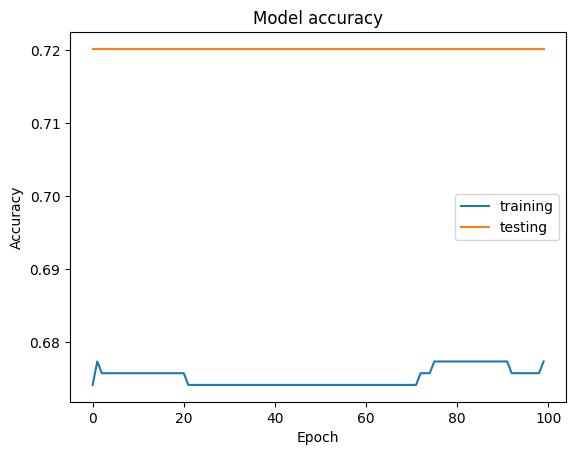

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**b. Visualize Loss for train and test**

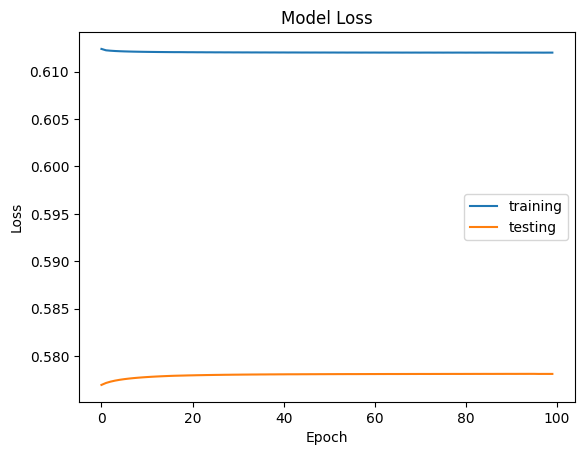

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='testing')
plt.title('Model Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()